    In this data set you will see dummy data for commercial interactions between Company_B and its suppliers (Vendor).
    The lines in the file represent 1-1 purchasing activity (declared as Purchase Order or PO) by Company_B and the corre-sponding details.
    
    Task:
    You are asked by the Global Supply Head to analyse the data, and create 3 highlighted insights that you also visualize. 
    Later you will present and explain this in the interview. Use Python for the exercise, and either Python, Tableau or PowerBI for the visualization.


In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [71]:
df = pd.read_excel("C:/Users/lily/Desktop/DS interview prep/Givaudan/Exercise1/Resources/Exercise1.xlsx", sheet_name="data")

In [72]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.0f}'.format)

In [73]:
df

,Purchase Order Receipt Month,Purchase Order #,Givaudan Plant Region,Givaudan Plant Code,Givaudan Plant Country,Vendor Code,Vendor Country,Material Code,Organized By Givaudan,Incoterms,Incoterms 2,Mode of Transport,Violation by Givaudan,Late Purchase Order Reason Code,Service Level,Service Level (Score Corrected),Purchase Order Qty (kg),Actual Lead Time,Lead Time in Givaudan System,Purchase Order Late (days),Late/Early Receipt,Requested Lead Time by Givaudan,Purchase Order Release,Early Release buckets,Nr of Local Vendors,% of Vendor from Total Qty,Top Vendor
0,2,1,APAC,MC,ID,60184,CN,3059901,No,CFR,"JAKARTA, ID",Sea,No,VENDOR ISSUES UNTIL INCOTERMS FULFILLMENT,0,0,1360,63,31,7,Late,56,1,1-5 early,2,1,Yes
1,2,2,APAC,MC,ID,60216,SG,10243,No,CFR,"JAKARTA, ID",Sea,Yes,Not assigned yet,100,100,400,44,61,-11,Early,55,-6,6-10 late,1,1,Yes
2,2,3,APAC,MC,ID,60217,IN,1486253,No,CFR,"JAKARTA, ID",Sea,No,Not assigned yet,100,100,600,69,41,-21,Early,90,15,11-15 early,1,1,Yes
3,2,4,APAC,MC,ID,60217,IN,9335903,No,CFR,"JAKARTA, ID",Sea,No,VENDOR ISSUES UNTIL INCOTERMS FULFILLMENT,0,0,180,93,41,36,Late,57,2,1-5 early,1,1,Yes
4,2,5,APAC,MC,ID,60439,CN,2313603,No,FCA,"XIAMEN, CN",Sea,No,TRANSPORTATION ISSUE / DELAY,0,100,180,69,44,4,Late,65,-18,16-20 late,2,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59479,3,59480,NOAM,WM,US,62461,US,2297009,No,FCA,"NEWARK NJ, US",Road,Yes,Not assigned,100,100,1,3,22,-3,Early,6,-16,16-20 late,1,1,Yes
59480,3,59481,EMEA,OP,FR,66776,FR,NaN,Yes,DDP,"POMACLE, FR",Road,Yes,Not assigned,100,100,15000,1,7,0,On Time,1,-16,16-20 late,2,1,Yes
59481,3,59482,APAC,ZC,CN,600837,CN,6100117,Yes,DDP,"CHANGZHOU, CN",Road,Yes,Not assigned,100,100,65,1,79,-3,Early,4,-75,>20 late,2,0,NaN
59482,3,59483,EMEA,OP,FR,66776,FR,NaN,Yes,DDP,"POMACLE, FR",Road,Yes,Not assigned,100,100,15000,1,7,0,On Time,1,-16,16-20 late,2,1,Yes



    Purchase Order Receipt Month to be transform to date.
    Givudan Plant Code, Incoterms, Incoterms2,  to be dropped. 
    Late PO Reason Code - Not assigned yet to be checked.
    Lead Time comparisons.
    


In [74]:
df.isnull().sum()/len(df)  

Purchase Order Receipt Month      0
Purchase Order #                  0
Givaudan Plant Region             0
Givaudan Plant Code               0
Givaudan Plant Country            0
Vendor Code                       0
Vendor Country                    0
Material Code                     0
Organized By Givaudan             0
Incoterms                         0
Incoterms 2                       0
Mode of Transport                 0
Violation by Givaudan             0
Late Purchase Order Reason Code   0
Service Level                     0
Service Level (Score Corrected)   0
Purchase Order Qty (kg)           0
Actual Lead Time                  0
Lead Time in Givaudan System      0
Purchase Order Late (days)        0
Late/Early Receipt                0
Requested Lead Time by Givaudan   0
Purchase Order Release            0
Early Release buckets             0
Nr of Local Vendors               0
% of Vendor from Total Qty        0
Top Vendor                        0
dtype: float64

In [75]:
df.isnull().sum()

Purchase Order Receipt Month          0
Purchase Order #                      0
Givaudan Plant Region                 0
Givaudan Plant Code                   0
Givaudan Plant Country                0
Vendor Code                          14
Vendor Country                        0
Material Code                      1662
Organized By Givaudan                 0
Incoterms                             0
Incoterms 2                           0
Mode of Transport                     0
Violation by Givaudan                 0
Late Purchase Order Reason Code       0
Service Level                         0
Service Level (Score Corrected)       0
Purchase Order Qty (kg)               0
Actual Lead Time                      0
Lead Time in Givaudan System          0
Purchase Order Late (days)            0
Late/Early Receipt                    0
Requested Lead Time by Givaudan       0
Purchase Order Release                0
Early Release buckets                 0
Nr of Local Vendors                   0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59484 entries, 0 to 59483
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Purchase Order Receipt Month     59484 non-null  float64
 1   Purchase Order #                 59484 non-null  int64  
 2   Givaudan Plant Region            59484 non-null  object 
 3   Givaudan Plant Code              59484 non-null  object 
 4   Givaudan Plant Country           59484 non-null  object 
 5   Vendor Code                      59470 non-null  float64
 6   Vendor Country                   59484 non-null  object 
 7   Material Code                    57822 non-null  float64
 8   Organized By Givaudan            59484 non-null  object 
 9   Incoterms                        59484 non-null  object 
 10  Incoterms 2                      59484 non-null  object 
 11  Mode of Transport                59484 non-null  object 
 12  Violation by Givau

*Comment: 27% of the Material Code and 9,7% of Top Vendor is missing. MC to be dropped. Missing values to be droped from Vendor Code, The Top Vendor - considered for beind handled.*

##### Dropping features

In [77]:
df.columns

Index(['Purchase Order Receipt Month', 'Purchase Order #',
       'Givaudan Plant Region', 'Givaudan Plant Code',
       'Givaudan Plant Country', 'Vendor Code', 'Vendor Country',
       'Material Code', 'Organized By Givaudan', 'Incoterms', 'Incoterms 2',
       'Mode of Transport', 'Violation by Givaudan',
       'Late Purchase Order Reason Code', 'Service Level',
       'Service Level (Score Corrected)', 'Purchase Order Qty (kg)',
       'Actual Lead Time', 'Lead Time in Givaudan System',
       'Purchase Order Late (days)', 'Late/Early Receipt',
       'Requested Lead Time by Givaudan', 'Purchase Order Release',
       'Early Release buckets', 'Nr of Local Vendors',
       '% of Vendor from Total Qty', 'Top Vendor'],
      dtype='object')

In [78]:
df2 = df.drop(['Givaudan Plant Code', 'Incoterms', 'Incoterms 2', 'Material Code'], axis=1)

##### Purchase Order Receipt Month

In [79]:
df['Purchase Order Receipt Month'].unique()

array([ 2.2022,  3.2022,  4.2022,  5.2022,  6.2022,  7.2022,  8.2022,
        9.2022, 10.2022, 11.2022, 12.2022,  1.2023,  2.2023,  3.2023])

In [80]:
df2['Purchase Order Receipt Month'] = df2['Purchase Order Receipt Month'].astype(str)
# df2['Purchase Order Receipt Month'] = df2['Purchase Order Receipt Month'].apply(lambda x: x.strip())
# df2['Purchase Order Receipt Month'] = df2['Purchase Order Receipt Month'].apply(lambda x: x.replace('.0', ''))
# df2['Purchase Order Receipt Month'].unique()

In [81]:
df2['Purchase Order Receipt Month'] = pd.to_datetime(df2['Purchase Order Receipt Month'], format='%m.%Y')

In [82]:
df2['Purchase Order Receipt Month'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 59484 entries, 0 to 59483
Series name: Purchase Order Receipt Month
Non-Null Count  Dtype         
--------------  -----         
59484 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 464.8 KB


Number of PO-s per months

In [83]:
monthly_orders = df2.groupby('Purchase Order Receipt Month')['Purchase Order Receipt Month'].count().reset_index(name='Count').sort_values(by='Purchase Order Receipt Month')
monthly_orders

,Purchase Order Receipt Month,Count
0,2022-02-01,4224
1,2022-03-01,4957
2,2022-04-01,4425
3,2022-05-01,4599
4,2022-06-01,4333
5,2022-07-01,4432
6,2022-08-01,4067
7,2022-09-01,3925
8,2022-10-01,3481
9,2022-11-01,3570


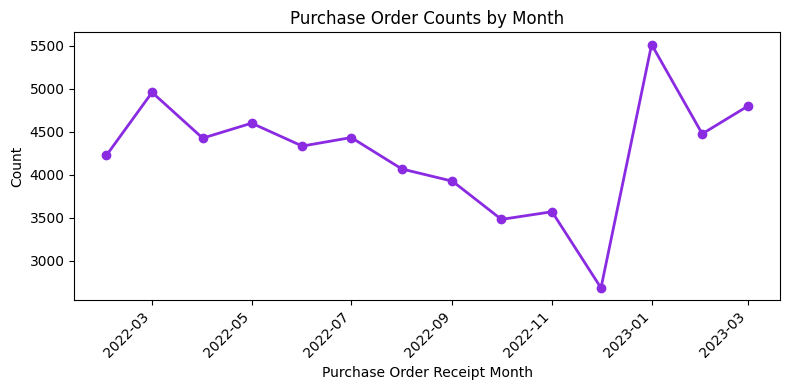

In [84]:
plt.figure(figsize=(8, 4))
plt.plot(monthly_orders['Purchase Order Receipt Month'], monthly_orders['Count'], marker='o', color='blueviolet', linestyle='-', linewidth=2)
plt.xlabel('Purchase Order Receipt Month')
plt.ylabel('Count')
plt.title('Purchase Order Counts by Month')
plt.xticks(rotation=45, ha='right') #horizontal alignment
plt.tight_layout()
plt.show()

In [85]:
monthly_orders2 = df2.groupby(['Givaudan Plant Region','Purchase Order Receipt Month'])['Purchase Order Receipt Month'].count().reset_index(name='Count').sort_values(by='Purchase Order Receipt Month')
monthly_orders2

,Givaudan Plant Region,Purchase Order Receipt Month,Count
0,APAC,2022-02-01,983
14,EMEA,2022-02-01,2028
42,NOAM,2022-02-01,582
28,LATAM,2022-02-01,631
29,LATAM,2022-03-01,686
15,EMEA,2022-03-01,2437
43,NOAM,2022-03-01,606
1,APAC,2022-03-01,1228
30,LATAM,2022-04-01,632
2,APAC,2022-04-01,906


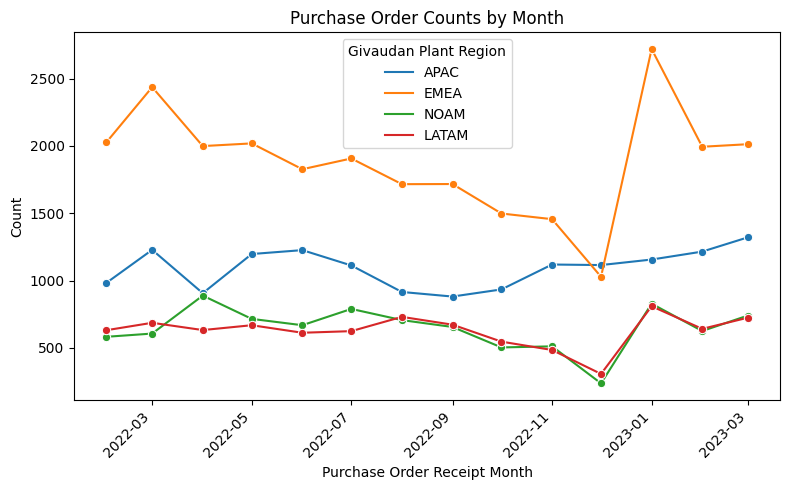

In [86]:
monthly_orders2['Purchase Order Receipt Month'] = pd.to_datetime(monthly_orders2['Purchase Order Receipt Month'])

plt.figure(figsize=(8,5))
sns.lineplot(data=monthly_orders2, x='Purchase Order Receipt Month', y='Count', hue='Givaudan Plant Region', marker='o')
plt.xlabel('Purchase Order Receipt Month')
plt.ylabel('Count')
plt.title('Purchase Order Counts by Month')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [87]:
monthly_orders.columns

Index(['Purchase Order Receipt Month', 'Count'], dtype='object')

##### Vendor Code

In [88]:
df2[df2['Vendor Code'].isna()].head()

,Purchase Order Receipt Month,Purchase Order #,Givaudan Plant Region,Givaudan Plant Country,Vendor Code,Vendor Country,Organized By Givaudan,Mode of Transport,Violation by Givaudan,Late Purchase Order Reason Code,Service Level,Service Level (Score Corrected),Purchase Order Qty (kg),Actual Lead Time,Lead Time in Givaudan System,Purchase Order Late (days),Late/Early Receipt,Requested Lead Time by Givaudan,Purchase Order Release,Early Release buckets,Nr of Local Vendors,% of Vendor from Total Qty,Top Vendor
2257,2022-02-01,2258,EMEA,FR,NaN,DE,No,Road,No,FORCES MAJEURES,100,100,200,267,30,213,Late,54,24,>20 early,2,0,NaN
2258,2022-02-01,2259,EMEA,FR,NaN,NL,Yes,Road,Yes,DELAY REQUESTED BY GIVAUDAN,100,100,1000,7,56,4,Late,3,-53,>20 late,2,1,Yes
6934,2022-03-01,6935,EMEA,FR,NaN,DE,No,Road,No,FORCES MAJEURES,100,100,200,141,30,73,Late,68,38,>20 early,2,0,NaN
6935,2022-03-01,6936,EMEA,FR,NaN,DE,No,Road,No,VENDOR ISSUES UNTIL INCOTERMS FULFILLMENT,0,0,200,112,30,44,Late,68,38,>20 early,2,0,NaN
6936,2022-03-01,6937,EMEA,FR,NaN,NL,Yes,Road,Yes,Not assigned yet,100,100,780,15,56,-1,Early,16,-40,>20 late,2,1,Yes


In [89]:
df2['Vendor Code'] = df2['Vendor Code'].fillna(0)

In [90]:
df2['Vendor Code'] = df2['Vendor Code'].dropna()

In [91]:
df2['Vendor Code'] = df2['Vendor Code'].astype(int)

In [92]:
df2['Vendor Code'].nunique()

863

In [93]:
above50order = df2['Vendor Code'].value_counts()[df2['Vendor Code'].value_counts() > 50]
above50order

Vendor Code
60738    4083
63548    3085
63490    2755
63340    2456
63538    2003
         ... 
61503      52
65255      51
66742      51
61804      51
60662      51
Name: count, Length: 182, dtype: int64

##### Givaudan Plant Region

In [94]:
unique_vendors = df2.groupby('Givaudan Plant Region')['Vendor Code'].nunique().sort_values(ascending=False)
unique_vendors

Givaudan Plant Region
EMEA     633
APAC     351
LATAM    285
NOAM     256
Name: Vendor Code, dtype: int64

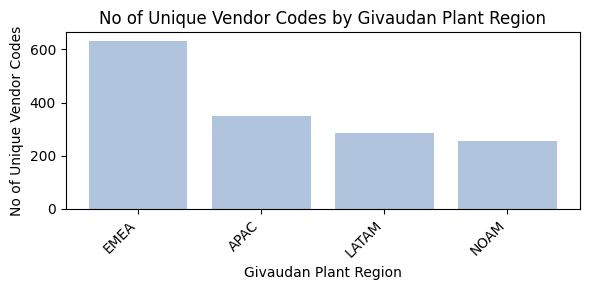

In [95]:
plt.figure(figsize=(6,3))
plt.bar(unique_vendors.index, unique_vendors.values, color='lightsteelblue')
plt.xlabel('Givaudan Plant Region')
plt.ylabel('No of Unique Vendor Codes')
plt.title('No of Unique Vendor Codes by Givaudan Plant Region')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

In [96]:
unique_vendors2 = df2.groupby(['Givaudan Plant Region','Mode of Transport'])['Vendor Code'].nunique().reset_index(name='Unique Vendor Count').sort_values(by='Unique Vendor Count',ascending=False)
unique_vendors2

,Givaudan Plant Region,Mode of Transport,Unique Vendor Count
7,EMEA,Road,444
8,EMEA,Sea,253
3,APAC,Sea,228
14,LATAM,Sea,187
2,APAC,Road,184
19,NOAM,Sea,143
4,EMEA,Air,143
0,APAC,Air,136
18,NOAM,Road,107
13,LATAM,Road,101


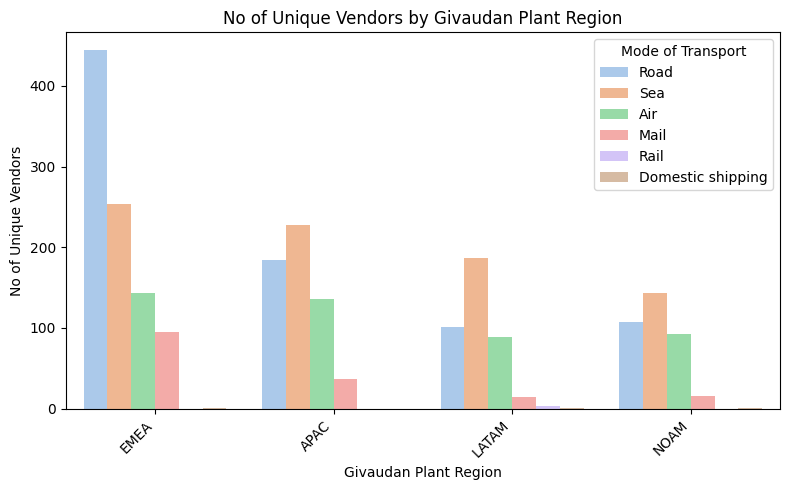

In [97]:
plt.figure(figsize=(8,5))
sns.barplot(data=unique_vendors2, x='Givaudan Plant Region', y='Unique Vendor Count', hue='Mode of Transport', palette='pastel')
plt.xlabel('Givaudan Plant Region')
plt.ylabel('No of Unique Vendors')
plt.title('No of Unique Vendors by Givaudan Plant Region')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

In [98]:
orders_kg = df2.groupby('Givaudan Plant Region')['Purchase Order Qty (kg)'].sum().sort_values(ascending=False)
orders_kg

Givaudan Plant Region
EMEA    115136669
APAC     78640049
LATAM    60805662
NOAM     32710179
Name: Purchase Order Qty (kg), dtype: float64

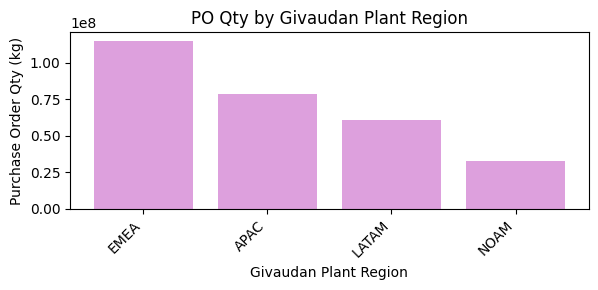

In [99]:
plt.figure(figsize=(6,3))
plt.bar(orders_kg.index, orders_kg.values, color='plum')
plt.xlabel('Givaudan Plant Region')
plt.ylabel('Purchase Order Qty (kg)')
plt.title('PO Qty by Givaudan Plant Region')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

In [100]:
orders_kg2 = df2.groupby(['Givaudan Plant Region','Mode of Transport'])['Purchase Order Qty (kg)'].sum().reset_index().sort_values(by='Purchase Order Qty (kg)',ascending=False)
orders_kg2

,Givaudan Plant Region,Mode of Transport,Purchase Order Qty (kg)
7,EMEA,Road,83490389
2,APAC,Road,53093665
13,LATAM,Road,34829910
8,EMEA,Sea,31010012
3,APAC,Sea,25395633
14,LATAM,Sea,23716680
19,NOAM,Sea,17103596
18,NOAM,Road,15409135
12,LATAM,Rail,2118200
4,EMEA,Air,562285


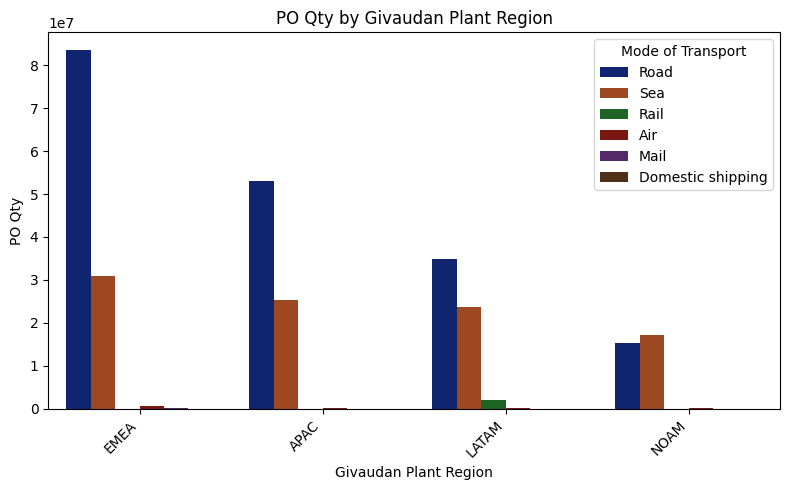

In [101]:
plt.figure(figsize=(8,5))
sns.barplot(data=orders_kg2, x='Givaudan Plant Region', y='Purchase Order Qty (kg)', hue='Mode of Transport', palette='dark')
plt.xlabel('Givaudan Plant Region')
plt.ylabel('PO Qty')
plt.title('PO Qty (kg) by Givaudan Plant Region')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

In [102]:
115136669/df2['Purchase Order Qty (kg)'].sum()

0.40076453468702117

In [103]:
region_counts = df2['Givaudan Plant Region'].value_counts()
region_counts

Givaudan Plant Region
EMEA     26359
APAC     15308
NOAM      9052
LATAM     8765
Name: count, dtype: int64

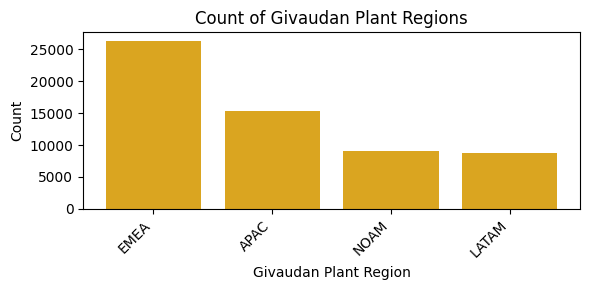

In [104]:
plt.figure(figsize=(6,3))
plt.bar(region_counts.index, region_counts.values, color='goldenrod')
plt.xlabel('Givaudan Plant Region')
plt.ylabel('Count')
plt.title('Count of Givaudan Plant Regions')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()

In [105]:
region_transport_counts = df2.groupby(['Givaudan Plant Region', 'Mode of Transport']).size().reset_index(name='Count')

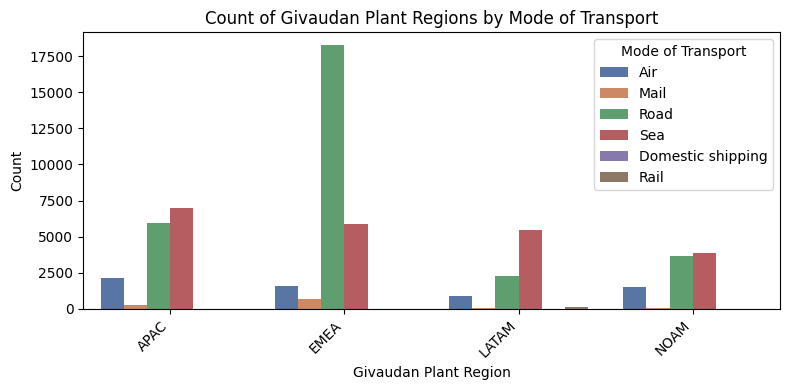

In [106]:
plt.figure(figsize=(8, 4))
sns.barplot(data=region_transport_counts, x='Givaudan Plant Region', y='Count', hue='Mode of Transport', palette='deep')
plt.xlabel('Givaudan Plant Region')
plt.ylabel('Count')
plt.title('Count of Givaudan Plant Regions by Mode of Transport')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

##### Organized By Givaudan

In [107]:
category_counts = df2['Organized By Givaudan'].value_counts()
category_counts 

Organized By Givaudan
No     36643
Yes    22841
Name: count, dtype: int64

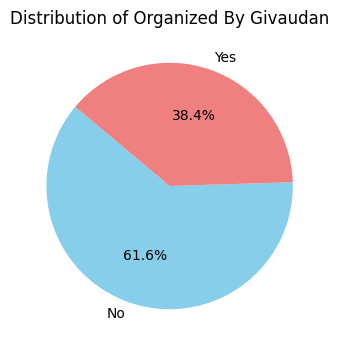

In [108]:
plt.figure(figsize=(4,4))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=140)
plt.title('Distribution of Organized By Givaudan')
plt.show()

In [109]:
22841/len(df2)

0.38398560957568423

In [110]:
organized_kg = df2.groupby('Organized By Givaudan')['Purchase Order Late (days)'].sum()
organized_kg 

Organized By Givaudan
No     339970
Yes     63484
Name: Purchase Order Late (days), dtype: int64

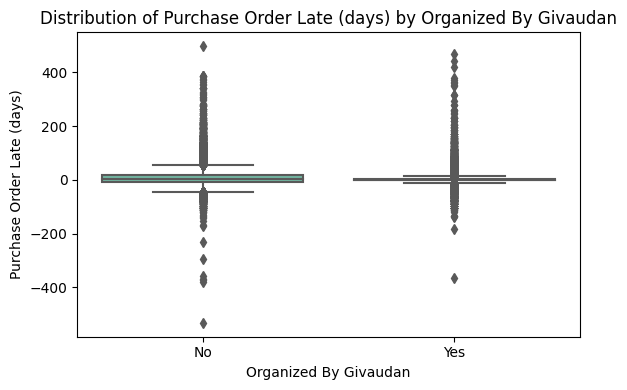

In [111]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df2, x='Organized By Givaudan', y='Purchase Order Late (days)', palette='Set2')
plt.xlabel('Organized By Givaudan')
plt.ylabel('Purchase Order Late (days)')
plt.title('Distribution of Purchase Order Late (days) by Organized By Givaudan')
plt.tight_layout()
plt.show()

*Comment: There are total 63 484 late days for those orders which where organized by Givaudan for the 59 484 orders.*

##### Mode of Transport

In [112]:
df2['Mode of Transport'].value_counts()

Mode of Transport
Road                 30111
Sea                  22124
Air                   6095
Mail                  1024
Rail                   126
Domestic shipping        4
Name: count, dtype: int64

In [113]:
result = df2.groupby('Mode of Transport').agg({
    'Purchase Order Qty (kg)': 'sum',
    'Purchase Order #': 'count'
}).rename(columns={'Purchase Order #': 'Purchase Order Count'})

result = result.sort_values(by='Purchase Order Count', ascending=False)
result

,Purchase Order Qty (kg),Purchase Order Count
Mode of Transport,,
Road,186823099,30111
Sea,97225921,22124
Air,1045513,6095
Mail,75077,1024
Rail,2118200,126
Domestic shipping,4750,4


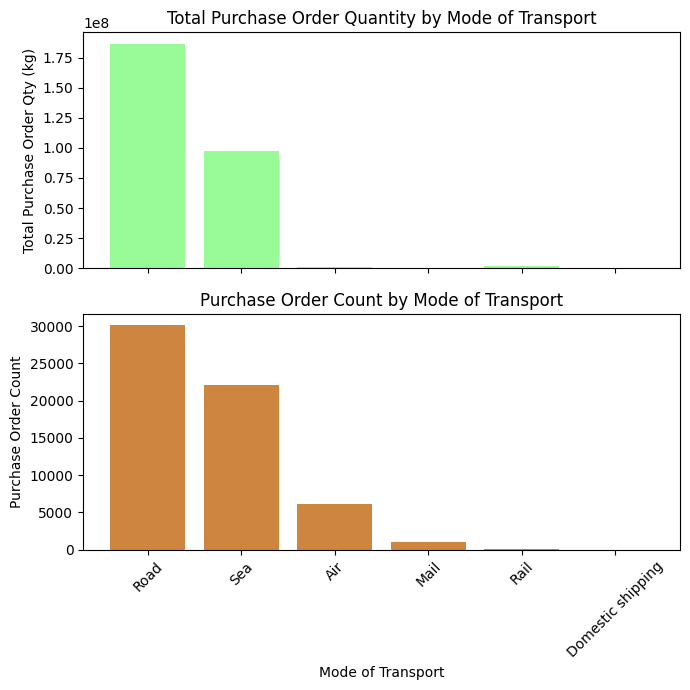

In [114]:
fig, axs = plt.subplots(2, 1, figsize=(7,7), sharex=True)

axs[0].bar(result.index, result['Purchase Order Qty (kg)'], color='palegreen')
axs[0].set_ylabel('Total Purchase Order Qty (kg)')
axs[0].set_title('Total Purchase Order Quantity by Mode of Transport')
axs[0].tick_params(axis='x', rotation=45)

axs[1].bar(result.index, result['Purchase Order Count'], color='peru')
axs[1].set_xlabel('Mode of Transport')
axs[1].set_ylabel('Purchase Order Count')
axs[1].set_title('Purchase Order Count by Mode of Transport')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

##### Violation by Givaudan

In [115]:
violated = df2['Violation by Givaudan'].value_counts()
violated

Violation by Givaudan
No     44446
Yes    15038
Name: count, dtype: int64

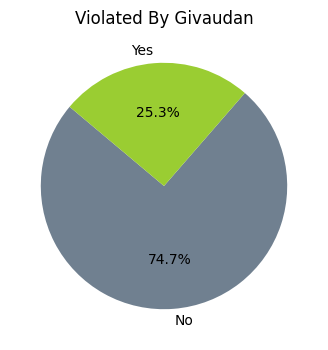

In [116]:
plt.figure(figsize=(4,4))
plt.pie(violated, labels=violated.index, autopct='%1.1f%%', colors=['slategrey', 'yellowgreen'], startangle=140)
plt.title('Violated By Givaudan')
plt.show()

In [117]:
15038/len(df2)

0.25280747764104633

*Comment: 25% of the contracts are violated by Givaudan.*

##### Late Purchase Order Reason Code

In [118]:
df2.groupby('Late Purchase Order Reason Code')['Purchase Order #'].count().reset_index(name='Count').sort_values(by='Count', ascending=False)

,Late Purchase Order Reason Code,Count
8,Not assigned yet,24433
13,VENDOR ISSUES UNTIL INCOTERMS FULFILLMENT,9841
7,Not assigned,6040
11,TRANSPORTATION ISSUE / DELAY,5603
3,DELAY REQUESTED BY GIVAUDAN,4597
5,FORCES MAJEURES,3309
6,INTERNAL DATA ERROR,1579
12,VENDOR ISSUES UNTIL INCOTERMS FULFILLMEN,1257
9,PEAK IN DEMAND / FORECAST ISSUE,717
1,CUSTOMS DELAY,671


*Comment: VENDOR ISSUES UNTIL INCOTERMS FULFILLMENT - is the majority of the reason for delay PO coding.*

In [119]:
24433/len(df2)

0.41074910900410194

In [120]:
(24433+6040)/len(df2)

0.5122890188958376

*Comment: 41% is not assigned yet. Total 51% is not assigned.*

##### Service Levels

In [121]:
df2['Service Level'].nunique()

2

In [122]:
df2['Service Level (Score Corrected)'].nunique()

2

In [123]:
df2['Service Level (Score Corrected)'].value_counts()

Service Level (Score Corrected)
100    49234
0      10250
Name: count, dtype: int64

In [124]:
10250/len(df2)

0.17231524443547844

*Comment: 17% failed to arrive on time to Givaudan Plant.*

##### Late/Early Receipt

PO-s received by Givaudan

In [125]:
df2['Late/Early Receipt'].value_counts()

Late/Early Receipt
Late       29902
Early      20886
On Time     8696
Name: count, dtype: int64

*Comment: Definately improvement is needed, since more than 50% of the orders arrived later than requested.*

##### Early Release

PO-s sent by Givaudan

In [126]:
buckets = df2.groupby('Early Release buckets')['Purchase Order #'].count().reset_index(name='Count').sort_values(by='Count', ascending=False)
buckets

,Early Release buckets,Count
0,1-5 early,11435
8,>20 early,10323
6,6-10 early,6980
9,>20 late,6822
1,1-5 late,5633
10,On Time,5586
2,11-15 early,3582
7,6-10 late,3023
4,16-20 early,2596
3,11-15 late,2111


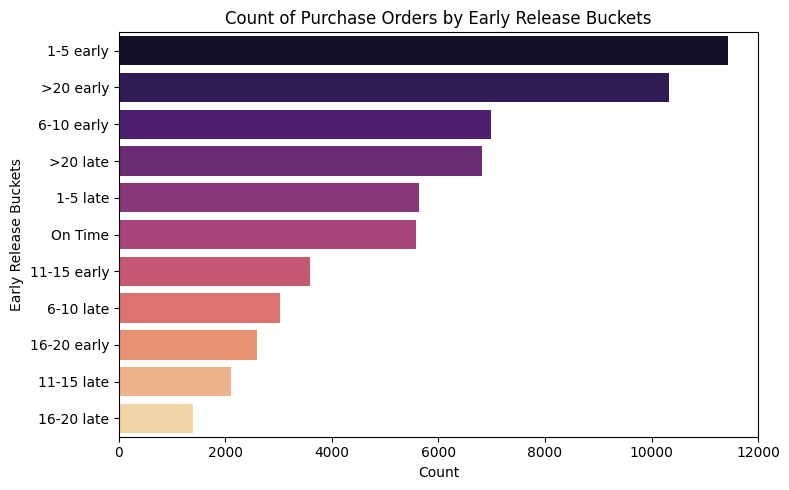

In [127]:
plt.figure(figsize=(8,5))
sns.barplot(data=buckets, y='Early Release buckets', x='Count', palette='magma')
plt.xlabel('Count')
plt.ylabel('Early Release Buckets')
plt.title('Count of Purchase Orders by Early Release Buckets')
plt.tight_layout()
plt.show()

*Comment: Majority of the orders are from the early bucket - which is good and means the Givaudan sent the order earlier than what is in the Vendor Agreement, however there is a room for improvement for the late items, especially for the >20 late ones.*

In [128]:
(len(df2) - (11435 + 10323 + 6980 + 5586))/len(df2)

0.42297088292650126

*Comment: 42% of the Givaudan PO release to be checked.*

In [129]:
new_order = [ 'Purchase Order #','Purchase Order Receipt Month',
       'Givaudan Plant Region', 'Givaudan Plant Country', 'Vendor Code',
       'Vendor Country', 'Organized By Givaudan', 'Mode of Transport',
       'Violation by Givaudan', 'Late Purchase Order Reason Code',
       'Service Level', 'Service Level (Score Corrected)',
       'Purchase Order Qty (kg)', 'Actual Lead Time', 'Lead Time in Givaudan System',
        'Requested Lead Time by Givaudan', 'Purchase Order Late (days)',
       'Late/Early Receipt','Purchase Order Release','Early Release buckets',
       'Nr of Local Vendors', '% of Vendor from Total Qty', 'Top Vendor'
]

In [130]:
df2 = df2[new_order]

In [131]:
df2.head()

,Purchase Order #,Purchase Order Receipt Month,Givaudan Plant Region,Givaudan Plant Country,Vendor Code,Vendor Country,Organized By Givaudan,Mode of Transport,Violation by Givaudan,Late Purchase Order Reason Code,Service Level,Service Level (Score Corrected),Purchase Order Qty (kg),Actual Lead Time,Lead Time in Givaudan System,Requested Lead Time by Givaudan,Purchase Order Late (days),Late/Early Receipt,Purchase Order Release,Early Release buckets,Nr of Local Vendors,% of Vendor from Total Qty,Top Vendor
0,1,2022-02-01,APAC,ID,60184,CN,No,Sea,No,VENDOR ISSUES UNTIL INCOTERMS FULFILLMENT,0,0,1360,63,31,56,7,Late,1,1-5 early,2,1,Yes
1,2,2022-02-01,APAC,ID,60216,SG,No,Sea,Yes,Not assigned yet,100,100,400,44,61,55,-11,Early,-6,6-10 late,1,1,Yes
2,3,2022-02-01,APAC,ID,60217,IN,No,Sea,No,Not assigned yet,100,100,600,69,41,90,-21,Early,15,11-15 early,1,1,Yes
3,4,2022-02-01,APAC,ID,60217,IN,No,Sea,No,VENDOR ISSUES UNTIL INCOTERMS FULFILLMENT,0,0,180,93,41,57,36,Late,2,1-5 early,1,1,Yes
4,5,2022-02-01,APAC,ID,60439,CN,No,Sea,No,TRANSPORTATION ISSUE / DELAY,0,100,180,69,44,65,4,Late,-18,16-20 late,2,1,Yes


##### Top Vendor

In [132]:
df2['Top Vendor'].value_counts()

Top Vendor
Yes      53254
50-50      408
Name: count, dtype: int64

## Final Notes

- **No of PO-s**: 
  - The highest was in January 2023, followed by March 2022 and March 2023.
  - The lowest was in December 2022.

- **Vendors and Orders**: 
  - 863 Vendors for 59,484 orders.

- **Region Analysis**:
  - Majority of the orders are shipped in the EMEA region:
    - 633 vendors
    - 115,136,669 kg (40% of the total weight of the orders)
    - 26,359 orders shipped to EMEA Givaudan Plants.

- **Organization by Givaudan**:
  - Around 38% of the orders are organized by Givaudan.

- **Transportation Mode**:
  - Majority of the transportation mode is by road, followed by sea.

- **Delays**:
  - Most frequent reason for the delayed coding: **VENDOR ISSUES UNTIL INCOTERMS FULFILLMENT**.
  - 50% of the orders are received late by Givaudan; however, Givaudan attempts to correct this gap by sending the orders earlier than agreed in the Vendor Agreement. 
  - Majority of the orders are from the early bucket.

## Room for Improvement

- **Contract Violations**:
  - 25% of the contracts are violated by Givaudan.

- **Assignment Status**:
  - 41% is not assigned yet.
  - Total 51% is not assigned for PO coding.

- **Delivery Issues**:
  - 17% failed to arrive on time to Givaudan Plant.

- **PO Release Check**:
  - 42% of the Givaudan PO release needs to be checked. to be checked.
